Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Head:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWi

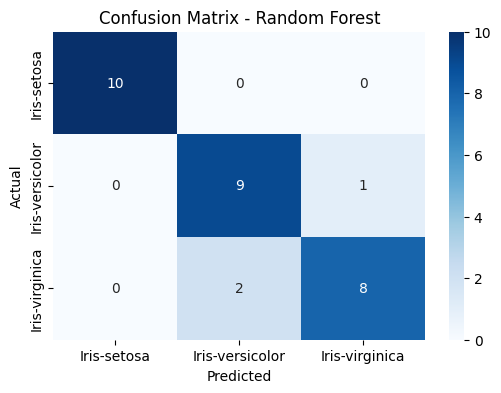


--- Comparing with Logistic Regression ---
Logistic Regression Accuracy: 0.97

Classification Report (Logistic Regression):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30


--- Comparing with Support Vector Machine ---
SVM Accuracy: 0.97

Classification Report (SVM):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0

In [ ]:
#Necessary packages
from logging import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/OIBSIP/Iris.csv' #file path
data = pd.read_csv(file_path)

print("Dataset Head:")
print(data.head())

print("\nDataset Info:")
print(data.info())

X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

y = data['Species']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n--- Model Evaluation (Random Forest) ---")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n--- Comparing with Logistic Regression ---")
model_lr = LogisticRegression(max_iter=200, random_state=42)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))

print("\n--- Comparing with Support Vector Machine ---")
model_svm = SVC(random_state=42)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

print("\n--- Summary of Model Accuracies ---")
print(f"Random Forest Accuracy: {accuracy:.2f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print(f"SVM Accuracy: {accuracy_svm:.2f}")

new_sample = [[5.1, 3.5, 1.4, 0.2]]
predicted_encoded = model.predict(new_sample)
predicted_species = label_encoder.inverse_transform(predicted_encoded)
print(f"\nPrediction for new sample {new_sample[0]}: {predicted_species[0]}")

new_sample_df = pd.DataFrame([[5.1, 3.6, 1.4, 0.2]],
                             columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

predicted_encoded = model.predict(new_sample_df) # Use the DataFrame here
predicted_species = label_encoder.inverse_transform(predicted_encoded)
print(f"\nPrediction for new sample {new_sample_df.iloc[0].tolist()}: {predicted_species[0]}")


